In [1]:
import h5py
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


{'filename': '/data/xenon/acolijn/optosim/data/event0.hd5f', 'nevents': 10000, 'nphoton_per_event': 10000, 'photon_zgen': 0.1, 'geometry': {'type': 'cylinder', 'radius': 2.5, 'ztop': 1.0, 'zliq': 0.0, 'zbot': -5.0}, 'npmt_xy': 2, 'pmt': {'type': 'square', 'size': 2.54, 'ndivs': 10}}
2.5
<HDF5 group "/events" (10000 members)>
0


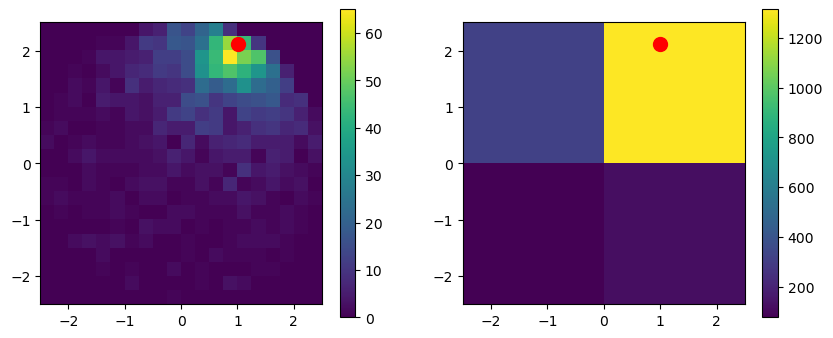

In [ ]:
# Open the HDF5 file in read mode
with h5py.File('/data/xenon/acolijn/optosim/data/mctest/event0.hd5f', 'r') as hf:
    
    # Access the 'config' group
    config = json.loads(hf.attrs['config'])
    print(config)
    print(config['geometry']['radius'])
    r = config['geometry']['radius']

    # Print the structure of the 'events' dataset
    events = hf['events']
    print(events)

    # Iterate over the elements in the dataset
    for event in events:
        event = events[event]
        print(event['number'][()])

        truth = np.array(event['true_position'])
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        fine = np.array(event['fine'])
        im = axs[0].imshow(fine.T, cmap='viridis', interpolation='nearest', origin='lower', extent=[-r,r,-r,r])
        plt.colorbar(im, ax=axs[0])
        axs[0].plot(truth[0], truth[1], marker='o', markersize=10, color='red', label='Marker')

        pmt = np.array(event['pmt'])
        im = axs[1].imshow(pmt.T, cmap='viridis', interpolation='nearest', origin='lower', extent=[-r,r,-r,r])
        plt.colorbar(im, ax=axs[1])
        axs[1].plot(truth[0], truth[1], marker='o', markersize=10, color='red', label='Marker')

        plt.show()
        input("Press Enter to continue to the next event...")